In [2]:
# Locally Weighted Regression
# 1) Read and Normalise the Dataset

# 2) Generate W for every query point!

# 3) No training is involved, directly make predictions using closed form solution we dervied!

# (X′WX)inv * X′WY where X' is X_Transpose

# 4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X = pd.read_csv('weightedX.csv')
Y = pd.read_csv('weightedY.csv')

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [6]:
plt.style.use('seaborn')

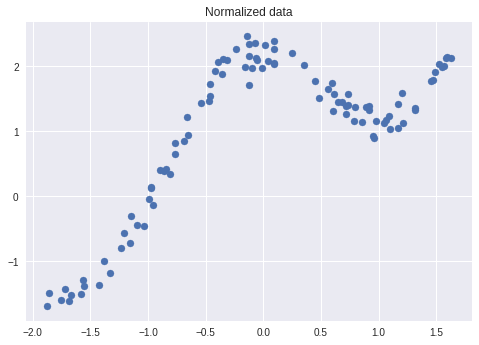

In [8]:
# normalization
X = (X - X.mean())/X.std()

plt.title('Normalized data')
plt.scatter(X, Y)
plt.show()

In [9]:
# find out W(MxM) matrix

#a*b ==> a,b -->matrices -->Matrix Multiplication
#a*b ==> a,b -->arrays --->Element Wise

In [11]:
def getW(query_point, X, tau):
    m = X.shape[0]
    # identity martix
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        x = query_point
        
        W[i, i] = np.exp(np.dot((xi-x), (xi-x).T)/(-2*tau*tau))
        
    return W

In [13]:
X = np.mat(X)
Y = np.mat(Y)

# for good prediction, tau should be small
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[4.35429051e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.32889617e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.32581012e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29085285e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.90271836e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.50591432e-05]]


In [14]:
# prediction

In [15]:
def predict(X, Y, query_x, tau):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_ = np.hstack((X, ones))
    
    qx = np.mat([query_x, 1])
    
    # get the value of weight W for particular point query_x
    W = getW(qx, X_, tau)
    # calculate theta: (X′WX)inv * X′WY
    theta = np.linalg.pinv(X_.T * (W * X_)) * (X_.T * (W * Y))
    # calculated prediction y
    pred = np.dot(qx, theta)
    
    return theta, pred

In [16]:
theta, pred = predict(X, Y, 1.0, 1.0)

In [17]:
print(theta)

[[0.1450545 ]
 [1.45059253]]


In [18]:
print(pred)

[[1.59564702]]


In [19]:
# visualise predictions

In [24]:
def plotPredictions(tau):
    X_test = np.linspace(-2, 2, 50)
    Y_test = []
    
    for xq in X_test:
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    X0 = np.array(X)
    Y0 = np.array(Y)
    # all are converted back to array to make graphs
    
    plt.scatter(X0, Y0)
    plt.scatter(X_test, Y_test, color = 'red')
    plt.title('Tau/bacndwidth parameter: {}'.format(tau))
    plt.show()

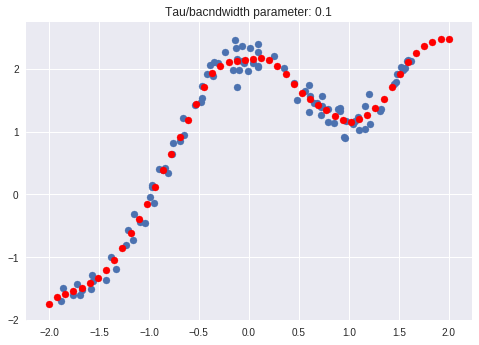

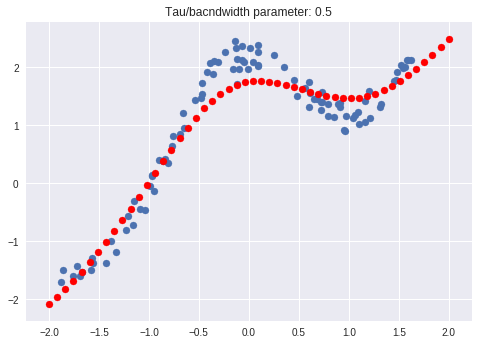

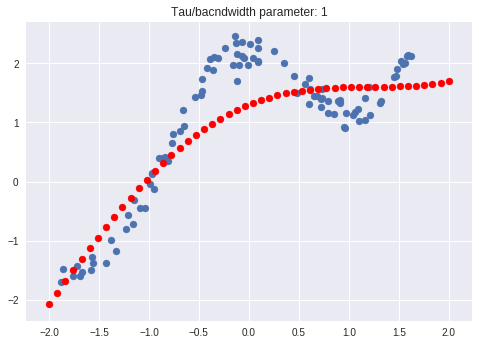

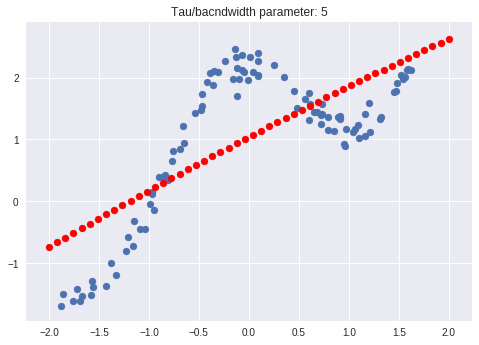

In [25]:
tau = [0.1, 0.5, 1, 5]
for t in tau:
    plotPredictions(t)